# **<u><p style='text-align:center;'> NOTABLE AI MODELS DATASET ANALYSIS AND PREDICTIONS. </p></u>**
<b><u>NOTE:</u></b>      Source dataset from kaggle.

In [2]:
#Manipulation libraries.
import pandas as pd
import numpy as np

#Visualization libraries.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load and upload the data file.
data = pd.read_csv('Datasets/notable_ai_models.csv')

# **1. DATA INSPECTION.** 
+ Geting a broad understanding of the dataset.

In [5]:
#Displaying the first 5 rows.
data.head()

System    Domain     Organization Organization categorization  \
0         Qwen2.5-72B  Language          Alibaba                    Industry   
1  Table Tennis Agent  Robotics  Google DeepMind                    Industry   
2          AFM-server  Language            Apple                    Industry   
3       AFM-on-device  Language            Apple                    Industry   
4     Mistral Large 2  Language       Mistral AI                    Industry   

  Country (from Organization)  \
0                       China   
1               Multinational   
2    United States of America   
3    United States of America   
4                      France   

                                             Authors Publication date  \
0                                                NaN       2024-09-19   
1  David B. D'Ambrosio, Saminda Abeyruwan, Laura ...       2024-08-07   
2  Andy Narayanan, Aonan Zhang, Bowen Zhang, Chen...       2024-07-29   
3  Andy Narayanan, Aonan Zhang, Bowen Zhang, Chen...       2024-07-29   
4  Albert Jiang, Alexandre Sablayrolles, Alexis T...       2024-07-24   

                                           Reference  \
0             Qwen2.5: A Party of Foundation Models!   
1  Achieving Human Level Competitive Robot Table ...   
2      Apple Intelligence Foundation Language Models   
3      Apple Intelligence Foundation Language Models   
4  Top-tier reasoning for high-complexity tasks, ...   

                                                Link  Citations  ...  \
0             https://qwenlm.github.io/blog/qwen2.5/        NaN  ...   
1  https://deepmind.google/research/publications/...        NaN  ...   
2  https://machinelearning.apple.com/research/app...        NaN  ...   
3  https://machinelearning.apple.com/research/app...        NaN  ...   
4        https://mistral.ai/news/mistral-large-2407/        NaN  ...   

  Confidence                                           Abstract  \
0  Confident  In the past three months since Qwen2’s release...   
1     Likely  Achieving human-level speed and performance on...   
2  Confident                                                NaN   
3  Confident  We present foundation language models develope...   
4     Likely  Today, we are announcing Mistral Large 2, the ...   

            Model accessibility Base model  Finetune compute (FLOP)  \
0    Open access (unrestricted)        NaN                      NaN   
1                    Unreleased        NaN                      NaN   
2        Hosted access (no API)        NaN                      NaN   
3        Hosted access (no API)        NaN                      NaN   
4  Open access (non-commercial)        NaN                      NaN   

  Finetune compute notes    Batch size  \
0                    NaN           NaN   
1                    NaN           NaN   
2                    NaN  1.894975e+07   
3                    NaN  1.894975e+07   
4                    NaN           NaN   

                                    Batch size notes  Frontier model  \
0                                                NaN             NaN   
1                                                NaN             NaN   
2  Main pretraining uses sequence length of 4096 ...             NaN   
3  Main pretraining uses sequence length of 4096 ...             NaN   
4                                                NaN             NaN   

  Training power draw (W)  
0                     NaN  
1                     NaN  
2            3.466814e+06  
3                     NaN  
4                     NaN  

[5 rows x 38 columns]

In [6]:
#Showing how many row and columns in the dataframe: 867 rows 38 colums
data.shape

(867, 38)

In [11]:
#Displays the data type of the all columns in the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   System                              867 non-null    object 
 1   Domain                              867 non-null    object 
 2   Organization                        853 non-null    object 
 3   Organization categorization         853 non-null    object 
 4   Country (from Organization)         853 non-null    object 
 5   Authors                             836 non-null    object 
 6   Publication date                    867 non-null    object 
 7   Reference                           858 non-null    object 
 8   Link                                865 non-null    object 
 9   Citations                           758 non-null    float64
 10  Notability criteria                 867 non-null    object 
 11  Notability criteria notes           440 non-n

In [13]:
#Checking for missing values.
data.isnull().sum()

System                                  0
Domain                                  0
Organization                           14
Organization categorization            14
Country (from Organization)            14
Authors                                31
Publication date                        0
Reference                               9
Link                                    2
Citations                             109
Notability criteria                     0
Notability criteria notes             427
Parameters                            287
Parameters notes                      365
Training compute (FLOP)               445
Training compute notes                436
Training dataset                      430
Training dataset notes                569
Training dataset size (datapoints)    438
Dataset size notes                    429
Epochs                                657
Training time (hours)                 676
Training time notes                   676
Training hardware                 

# **2. DATA CLEANING AND PREPROCESSING.**

In [16]:
#Checking for duplicates.
if data.duplicated().sum() > 0:
#Removing duplicate rows if the dataset and store in ai_models.
    ai_models = data.drop_duplicates()
    print("Duplicates removed.")
else:
 #If No duplicates found, just rename data to ai_models for further processing.
    ai_models = data
    print("No duplicates found.")

No duplicates found.


In [18]:
#Replacing missing numerical data with appropriate value (0) based on context of the dataset.
numerical_cols = ai_models.select_dtypes(include=['float64', 'int64']).columns
ai_models[numerical_cols] = ai_models[numerical_cols].fillna(0)

#For categorical columns, replace missing values with 'Unknown'.
categorical_cols = ai_models.select_dtypes(include=['object']).columns
ai_models[categorical_cols] = ai_models[categorical_cols].fillna('Unknown')

In [20]:
#Checking for any remaining missing values after cleaning.
ai_models.isnull().sum()

System                                0
Domain                                0
Organization                          0
Organization categorization           0
Country (from Organization)           0
Authors                               0
Publication date                      0
Reference                             0
Link                                  0
Citations                             0
Notability criteria                   0
Notability criteria notes             0
Parameters                            0
Parameters notes                      0
Training compute (FLOP)               0
Training compute notes                0
Training dataset                      0
Training dataset notes                0
Training dataset size (datapoints)    0
Dataset size notes                    0
Epochs                                0
Training time (hours)                 0
Training time notes                   0
Training hardware                     0
Hardware quantity                     0


In [22]:
#Display the first few cleaned rows.
ai_models.head()

System    Domain     Organization Organization categorization  \
0         Qwen2.5-72B  Language          Alibaba                    Industry   
1  Table Tennis Agent  Robotics  Google DeepMind                    Industry   
2          AFM-server  Language            Apple                    Industry   
3       AFM-on-device  Language            Apple                    Industry   
4     Mistral Large 2  Language       Mistral AI                    Industry   

  Country (from Organization)  \
0                       China   
1               Multinational   
2    United States of America   
3    United States of America   
4                      France   

                                             Authors Publication date  \
0                                            Unknown       2024-09-19   
1  David B. D'Ambrosio, Saminda Abeyruwan, Laura ...       2024-08-07   
2  Andy Narayanan, Aonan Zhang, Bowen Zhang, Chen...       2024-07-29   
3  Andy Narayanan, Aonan Zhang, Bowen Zhang, Chen...       2024-07-29   
4  Albert Jiang, Alexandre Sablayrolles, Alexis T...       2024-07-24   

                                           Reference  \
0             Qwen2.5: A Party of Foundation Models!   
1  Achieving Human Level Competitive Robot Table ...   
2      Apple Intelligence Foundation Language Models   
3      Apple Intelligence Foundation Language Models   
4  Top-tier reasoning for high-complexity tasks, ...   

                                                Link  Citations  ...  \
0             https://qwenlm.github.io/blog/qwen2.5/        0.0  ...   
1  https://deepmind.google/research/publications/...        0.0  ...   
2  https://machinelearning.apple.com/research/app...        0.0  ...   
3  https://machinelearning.apple.com/research/app...        0.0  ...   
4        https://mistral.ai/news/mistral-large-2407/        0.0  ...   

  Confidence                                           Abstract  \
0  Confident  In the past three months since Qwen2’s release...   
1     Likely  Achieving human-level speed and performance on...   
2  Confident                                            Unknown   
3  Confident  We present foundation language models develope...   
4     Likely  Today, we are announcing Mistral Large 2, the ...   

            Model accessibility Base model  Finetune compute (FLOP)  \
0    Open access (unrestricted)    Unknown                      0.0   
1                    Unreleased    Unknown                      0.0   
2        Hosted access (no API)    Unknown                      0.0   
3        Hosted access (no API)    Unknown                      0.0   
4  Open access (non-commercial)    Unknown                      0.0   

  Finetune compute notes    Batch size  \
0                Unknown  0.000000e+00   
1                Unknown  0.000000e+00   
2                Unknown  1.894975e+07   
3                Unknown  1.894975e+07   
4                Unknown  0.000000e+00   

                                    Batch size notes  Frontier model  \
0                                            Unknown         Unknown   
1                                            Unknown         Unknown   
2  Main pretraining uses sequence length of 4096 ...         Unknown   
3  Main pretraining uses sequence length of 4096 ...         Unknown   
4                                            Unknown         Unknown   

  Training power draw (W)  
0            0.000000e+00  
1            0.000000e+00  
2            3.466814e+06  
3            0.000000e+00  
4            0.000000e+00  

[5 rows x 38 columns]

# **3. DESCRIPTIVE STATISTICS.**
+ Calculate basic summary statistics of the DataFrame; count, mean, max, min, max, std(Standard deviation), lower percentile is 25 and the upper percentile is 75.The 50 percentile is the same as the median.

In [25]:
#Describes the descriptive statistics of the dataframe.
ai_models.describe()

Citations    Parameters  Training compute (FLOP)  \
count     867.000000  8.670000e+02             8.670000e+02   
mean     4833.687428  2.198187e+10             2.943034e+23   
std     14030.924856  1.176587e+11             2.565363e+24   
min         0.000000  0.000000e+00             0.000000e+00   
25%        74.000000  0.000000e+00             0.000000e+00   
50%       707.000000  1.820000e+07             0.000000e+00   
75%      3555.000000  6.675000e+08             7.542000e+19   
max    172714.000000  1.600000e+12             5.000000e+25   

       Training dataset size (datapoints)         Epochs  \
count                        8.670000e+02     867.000000   
mean                         2.033879e+11     273.483028   
std                          1.262125e+12    6506.475920   
min                          0.000000e+00       0.000000   
25%                          0.000000e+00       0.000000   
50%                          0.000000e+00       0.000000   
75%                          4.205000e+07       0.000000   
max                          1.800000e+13  191400.000000   

       Training time (hours)  Hardware quantity  Hardware utilization  \
count             867.000000         867.000000            867.000000   
mean              108.885860         281.072664              0.013793   
std               441.871392        2357.804271              0.073403   
min                 0.000000           0.000000              0.000000   
25%                 0.000000           0.000000              0.000000   
50%                 0.000000           0.000000              0.000000   
75%                 0.000000           0.000000              0.000000   
max              7104.000000       55000.000000              0.565000   

       Training compute cost (2023 USD)  Finetune compute (FLOP)  \
count                      8.670000e+02             8.670000e+02   
mean                       1.476228e+05             3.393713e+20   
std                        1.821891e+06             7.345537e+21   
min                        0.000000e+00             0.000000e+00   
25%                        0.000000e+00             0.000000e+00   
50%                        0.000000e+00             0.000000e+00   
75%                        0.000000e+00             0.000000e+00   
max                        4.058659e+07             2.142900e+23   

         Batch size  Training power draw (W)  
count  8.670000e+02             8.670000e+02  
mean   3.327947e+05             2.079112e+05  
std    2.858205e+06             1.753687e+06  
min    0.000000e+00             0.000000e+00  
25%    0.000000e+00             0.000000e+00  
50%    0.000000e+00             0.000000e+00  
75%    0.000000e+00             0.000000e+00  
max    6.400000e+07             2.470979e+07

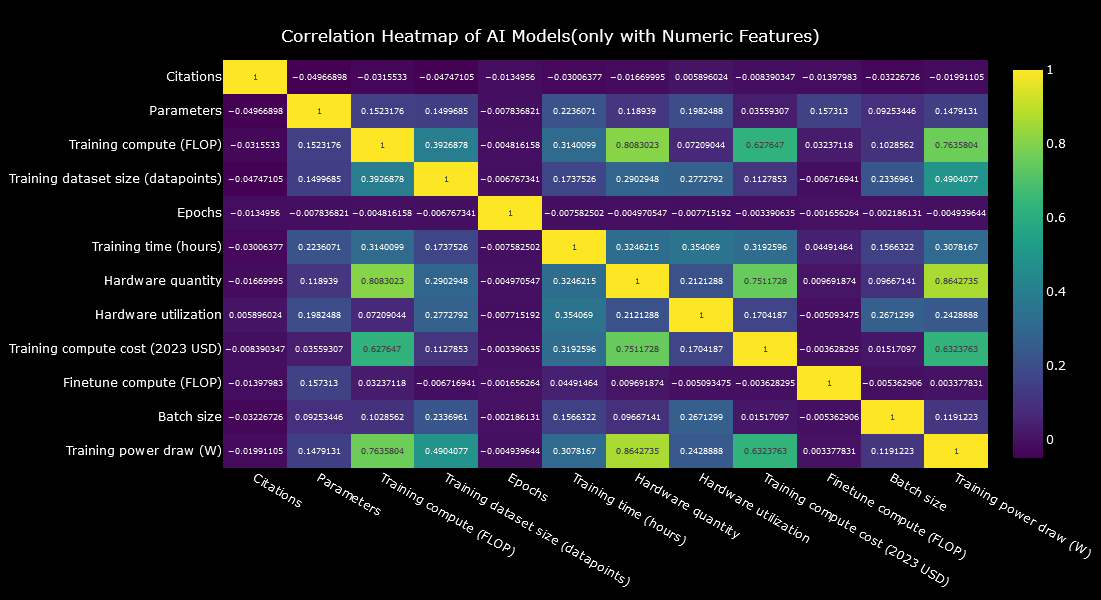

In [27]:
#Select only the numeric columns.
numeric_columns = ai_models.select_dtypes(include=[float, int])
#Define the correlation matrix.
ai_models_correlation = numeric_columns.corr()

#Library that generates interactive web-based visualizations.
import plotly.express as px
#Plotting Visualizing heatmap correlation.
Heatmap = px.imshow(ai_models_correlation, text_auto=True,  color_continuous_scale='Viridis', aspect='auto')
#Naming a title, setting figure size, and background color.
Heatmap.update_layout(
     title={
        'text': 'Correlation Heatmap of AI Models(only with Numeric Features)',
        'x': 0.5,  #Centering the title.
        'xanchor': 'center',  #Ensure the title is centered.
        'yanchor': 'top'
     },
     paper_bgcolor='black', #For background color outside the plot area.
     plot_bgcolor='black',  #For background color of the plot area.
     font_color='white', #Changing the font color to white for readability and visibility.
     height=600    #Height in pixels.
)

#Displaying the heatmap.
Heatmap.show()

# **4. EXPLORATORY DATA ANALYSIS(EDA).**
+ Show insights, patterns and relationships within the dataset With the data cleaned ~ ai_models.

In [29]:
#Rename multiple columns for easy readability.
ai_models.rename(columns={'Organization categorization': 'Organization_Categorization', 'Country (from Organization)': 'Country_from_Organization',
                         'Model accessibility': 'Model_accessibility'},inplace=True)

<font size='5'>1. Insights analysis of System column.</font>
   + This column contain names of the AI models.

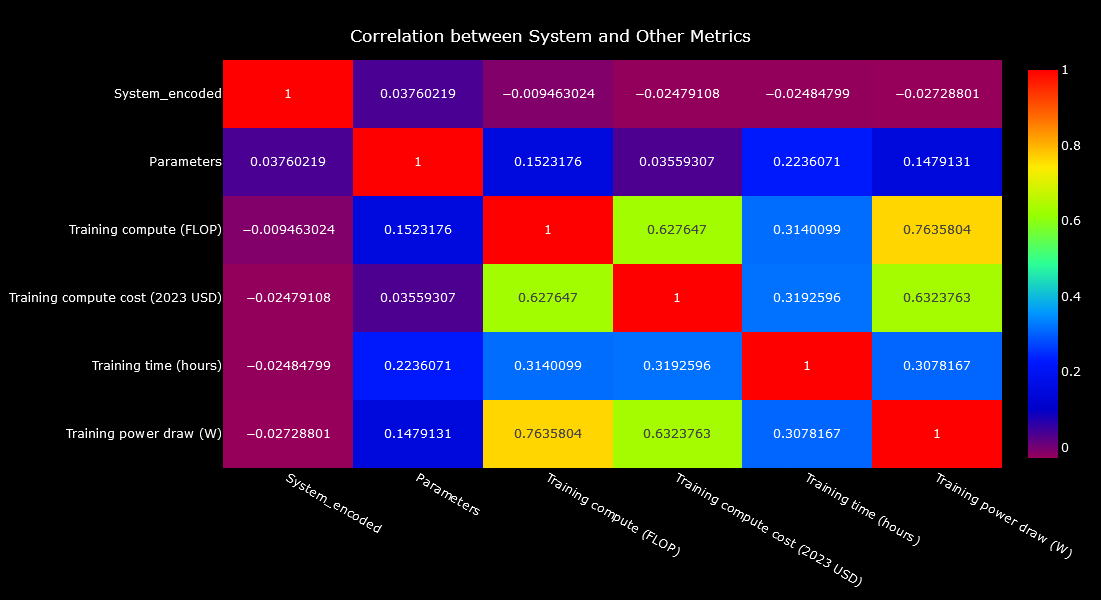

In [33]:
#Encoding the 'System' column to numeric values because it's categorical.
ai_models['System_encoded'] = ai_models['System'].astype('category').cat.codes

#Define the correlation between System and other numeric columns.
system_correlation_matrix = ai_models[['System_encoded', 'Parameters', 'Training compute (FLOP)','Training compute cost (2023 USD)',
                                       'Training time (hours)','Training power draw (W)']].corr()

#Plotting Visualizing heatmap correlation.
system_correlation_matrix = px.imshow(system_correlation_matrix, text_auto=True,   color_continuous_scale=px.colors.sequential.Rainbow, aspect='auto')

#Naming a title, setting figure size, and background color.
system_correlation_matrix.update_layout(
     title={
        'text': 'Correlation between System and Other Metrics',
        'x': 0.5,  #Centering the title.
        'xanchor': 'center',  #Ensure the title is centered.
        'yanchor': 'top'
     },
     paper_bgcolor='black', #For background color outside the plot area.
     plot_bgcolor='black',  #For background color of the plot area.
     font_color='white', #Changing the font color to white for readability and visibility.
     height=600    #Height in pixels.
)

#Displaying the heatmap.
system_correlation_matrix.show()

<font size= 4><u><b>**Obervations from the above visual** : </b></u></font><br> 
1. System Encoded vs Other Metrics.
    + System_encoded column shows weak correlations with all other metrics. Its only highest correlation is with Parameters ~ 0.037.
2. Parameters.
    + Training compute (FLOP) has a moderate positive correlation 0f 0.152,this means as the number of parameters increases the compute (FLOP) tends to increase.
    + Training time (hours) has a Positive correlation of 0.223 indicating that models with more parameters tend to have longer training times.
    + Training power draw (W) has a weak positive correlation of 0.147 this indicates that models with more parameters slightly increase the power draw during training.
3. Training compute (FLOP).
    + Training power draw (W) has a strong correlation of 0.763 this shows that higher FLOP computations requires more power.
    + Training compute cost (2023 USD) has a moderate correlation of 0.627 this shows that higher computational loads tend to increase the training costs.
4. Training Time (hours):
   + Training compute cost (2023 USD) has a moderate positive correlation of 0.319 this indicates longer training times do increase the cost of training.
   + Training power draw (W) has a weak positive correlation of 0.307 this indicates that longer training times increase power draw slightly.
5. Training Power Draw (W):
   + There is a strong correlation with both Training compute (FLOP) ~ 0.763 and Training compute cost ~ 0.632 it shows that more powerful hardware usage  is linked with higher computational workloads and costs.

<font size='5'>2. Insights comparative analysis of Domain column vs Parameters,Training compute (FLOP),Training time (hours),Training compute cost (2023 USD), Training power draw (W).</font>
   + This column indicates the specific field in which the model is used.

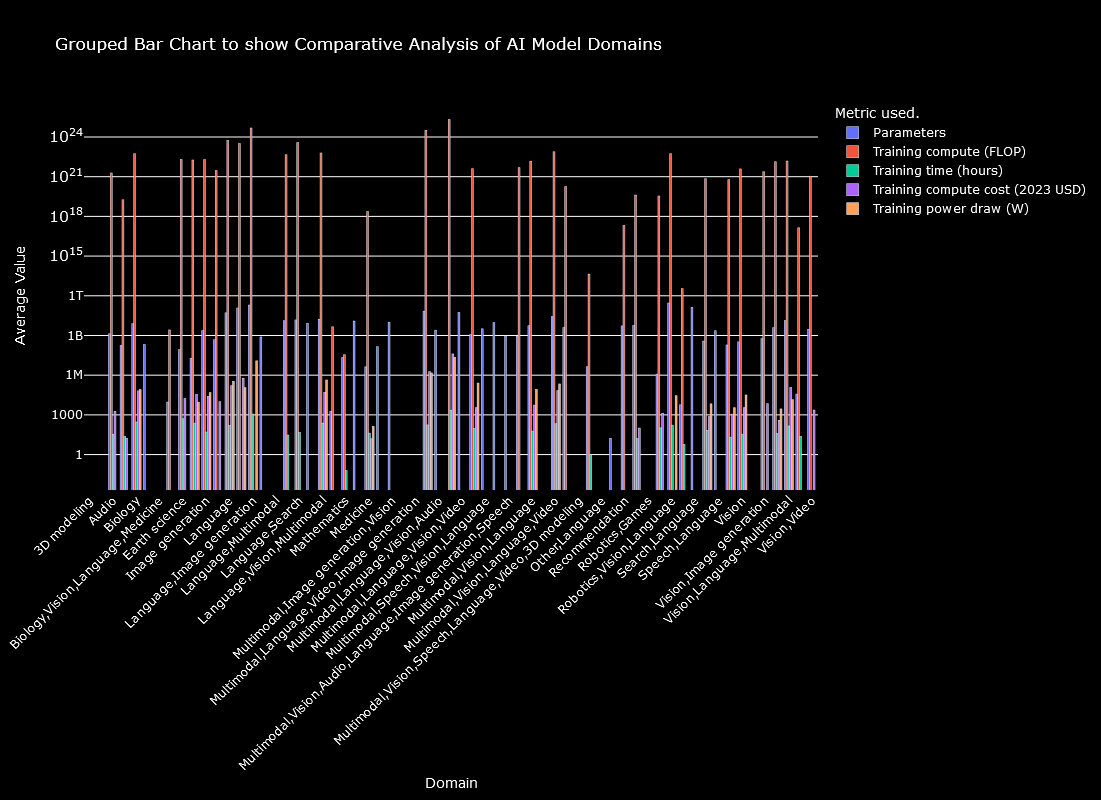

In [37]:
#Group the data by Domain and calculate the mean for the specified columns.
domain_comparison = ai_models.groupby('Domain')[['Parameters', 'Training compute (FLOP)','Training time (hours)','Training compute cost (2023 USD)', 
                                                'Training power draw (W)']].mean()
#library for creating interactive visualizations.
import plotly.graph_objects as go

#Ploting a grouped bar chart using Plotly graph objects.
fig = go.Figure()

#Plotting/Creating bars for each metric that is being used.
metrics = ['Parameters', 'Training compute (FLOP)', 'Training time (hours)','Training compute cost (2023 USD)', 'Training power draw (W)']

#Looping over metrics and to add one trace for each
for metric in metrics:
    fig.add_trace(go.Bar(
        x=domain_comparison.index,
        y=domain_comparison[metric],
        name=metric
    ))
    
#Customizing layout,naming a title,setting figure size and background color for readability.
fig.update_layout(
    barmode='group',  #Group bars together.
    title='Grouped Bar Chart to show Comparative Analysis of AI Model Domains',
    xaxis_title='Domain',
    yaxis_title='Average Value',
    width=1100, height=800,  #Increased width and height for readability.
    plot_bgcolor='black',   #For background color of the plot area.
    paper_bgcolor='black',  #For background color outside the plot area.
    font_color='white',     #Changing the font color to white for readability and visibility.
    legend_title_text='Metric used.',
    xaxis_tickangle=-45,  #Rotate x-axis labels for visibility.
    yaxis_type='log'  #Using log scale for better visualization.
)

# Displaying the Bar plot.
fig.show()

<font size='5'>3. Insights analysis of Model accessibility column.</font>
   + This column indicates how accessible the model is.

In [40]:
# Count of models per accessibility type (assuming 'Accessibility' column exists)
accessibility_distribution = ai_models['Model_accessibility'].value_counts()

print("Model Accessibility Distribution:\n", accessibility_distribution)

Model Accessibility Distribution:
 Model_accessibility
Unknown                         429
Unreleased                      195
Open access (unrestricted)      145
Open access (non-commercial)     41
API access                       28
Open access (restricted use)     22
Hosted access (no API)            7
Name: count, dtype: int64


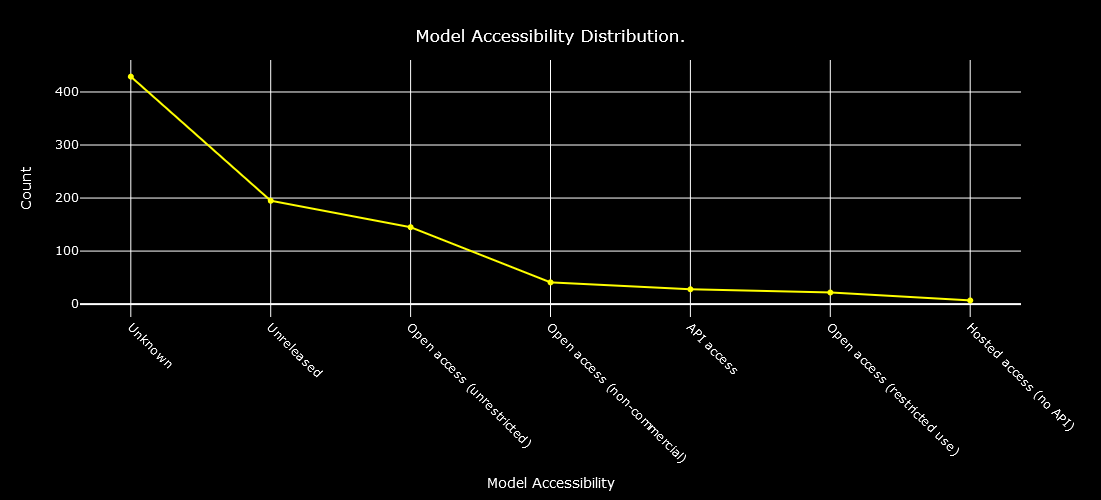

In [42]:
#Reseting the index to make the 'Model_accessibility' column available for plotting.
model_accessibility_distribution = accessibility_distribution.reset_index()
model_accessibility_distribution.columns = ['Model_accessibility', 'count']

#Plot line plot using plotly.express.
fig = px.line( model_accessibility_distribution,  x='Model_accessibility', y='count', color_discrete_sequence=['yellow'],
              markers=True # Adds markers to each point
             )
            
#Customizing layout,naming a title,setting figure size and background color for readability.
fig.update_layout(
     title={
        'text': 'Model Accessibility Distribution.',
        'x': 0.5,  #Centering the title.
        'xanchor': 'center',  #Ensure the title is centered.
        'yanchor': 'top'
     },
     xaxis_title='Model Accessibility',
     xaxis_tickangle=45,  # Rotate x-axis labels
     yaxis_title='Count',
     paper_bgcolor='black', #For background color outside the plot area.
     plot_bgcolor='black',  #For background color of the plot area.
     font_color='white', #Changing the font color to white for readability and visibility.
     height=500,   #Height in pixels. 
)

#Displayint the Line plot.
fig.show()

C:\Users\sa\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



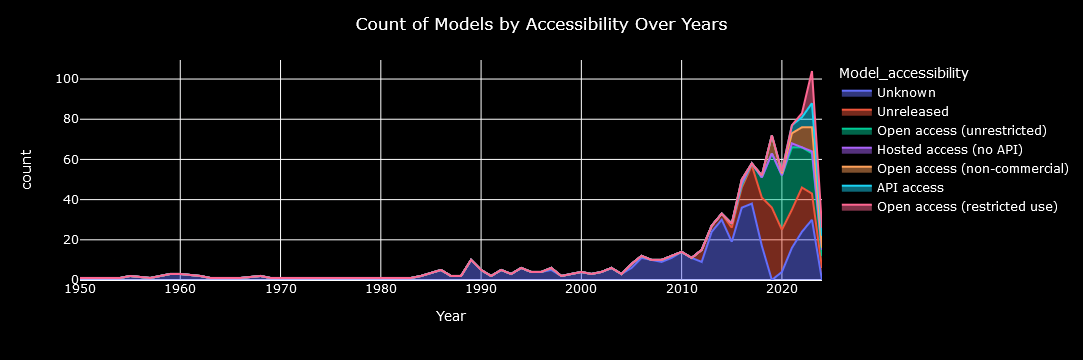

In [44]:
#Converting Publication date to year.
ai_models['Publication date'] = pd.to_datetime(ai_models['Publication date'], errors='coerce')
ai_models['Year'] = ai_models['Publication date'].dt.year

#Group data by (Publication date) Year,Model accessibility and count the number of models.
model_accessibility_over_years = ai_models.groupby(['Year', 'Model_accessibility']).size().reset_index(name='count')

#Ploting an area plot with Plotly Express.
fig = px.area(model_accessibility_over_years, x='Year', y='count', color='Model_accessibility')

#Customizing layout,naming a title,setting figure size and background color for readability.
fig.update_layout(
     title={
        'text': 'Count of Models by Accessibility Over Years',
        'x': 0.5,  #Centering the title.
     },
     paper_bgcolor='black', #For background color outside the plot area.
     plot_bgcolor='black',  #For background color of the plot area.
     font_color='white', #Changing the font color to white for readability and visibility.
)

#Displaying the plot.
fig.show()

<font size= 4><u><b>**Obervations from the above visual** : </b></u></font><br> 
1. Small but consistent number of models are either unreleased or have unknown accessibility it indicates some models remain proprietary or details are not available.
2. The rise of API-accessible models in recent years reflects a trend toward offering access via APIs instead of fully open releases.<br>

** <b><u>Insights from the visual:</u></b><br>
+ Increase in API-accessible models with usage restrictions shows an emphasis on controlled, managed access due to commercial or ethical reasons.
+ The availability of models through open access (both unrestricted and non-commercial) and APIs is growing, highlighting the industry's shift toward public engagement and commercialization.

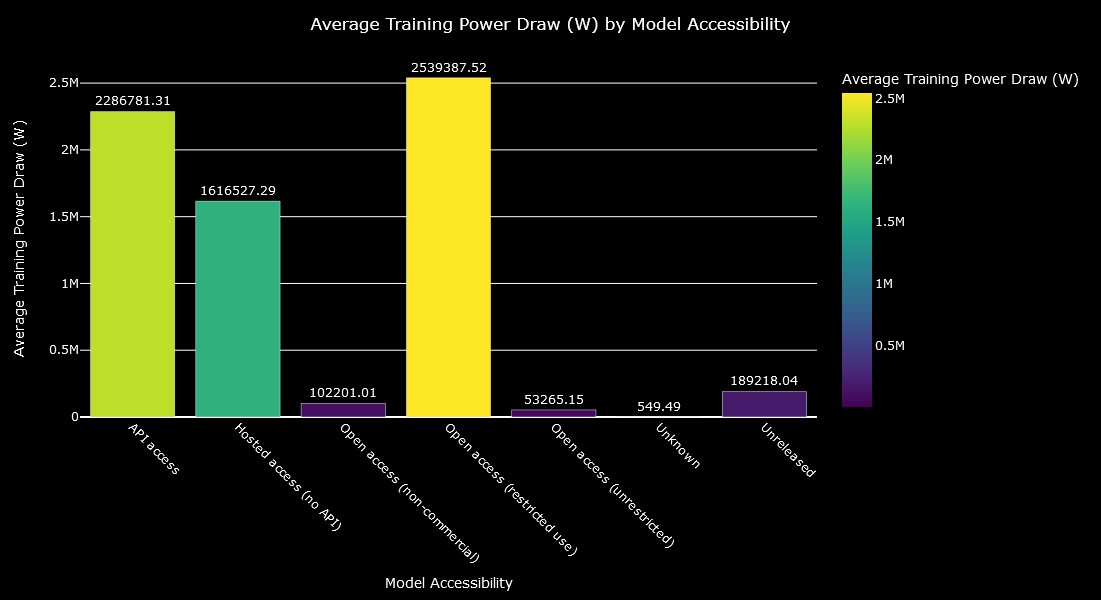

In [47]:
#Group the data by Model accessibility and calculate the mean for the specified column;Training Power Draw (W).
power_vs_accessibility = ai_models.groupby('Model_accessibility')['Training power draw (W)'].mean().reset_index()

#Plot the bar plot using plotly.express.
fig = px.bar(power_vs_accessibility, x='Model_accessibility', y='Training power draw (W)', color='Training power draw (W)',  # Add color scale
             labels={'Model_accessibility': 'Model Accessibility','Training power draw (W)': 'Average Training Power Draw (W)'},
             color_continuous_scale='viridis', text='Training power draw (W)'  # Display values on bars
            )

#This ensures text is properly formatted and positioned on top of the bars.
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

#Customizing layout,naming a title,setting figure size and background color for readability.
fig.update_layout(
     title={
        'text': 'Average Training Power Draw (W) by Model Accessibility',
        'x': 0.5,  #Centering the title.
     },
     paper_bgcolor='black', #For background color outside the plot area.
     plot_bgcolor='black',  #For background color of the plot area.
     font_color='white', #Changing the font color to white for readability and visibility.
     xaxis_tickangle=45,  # Rotate x-axis labels
     height=600,   #Height in pixels. 
)

#Display the bar plot.
fig.show()

<font size= 4><u><b>**Obervations from the above visual** : </b></u></font><br> 
1. Models with Open access (unrestricted) have the highest average training power draw reaching 2.53M watts, followed by those with API access at 2.29M watts.
2. Models with Hosted access (no API) consume a significant but lower amount averaging 1.62M watts.
3. Models with Open access (non-commercial), Open access (restricted use) and Unreleased shows lower power draws under 200K watts and Unknown access have an extremely low value of 549.49 watts.<br>

** <b><u>Insights from the visual:</u></b><br>
+ Restricted and non-commercial access models consume far less power this indicates potential optimizations or smaller-scale training for these models.
+ Most of open and unrestricted models tend to have  higher power requirements.

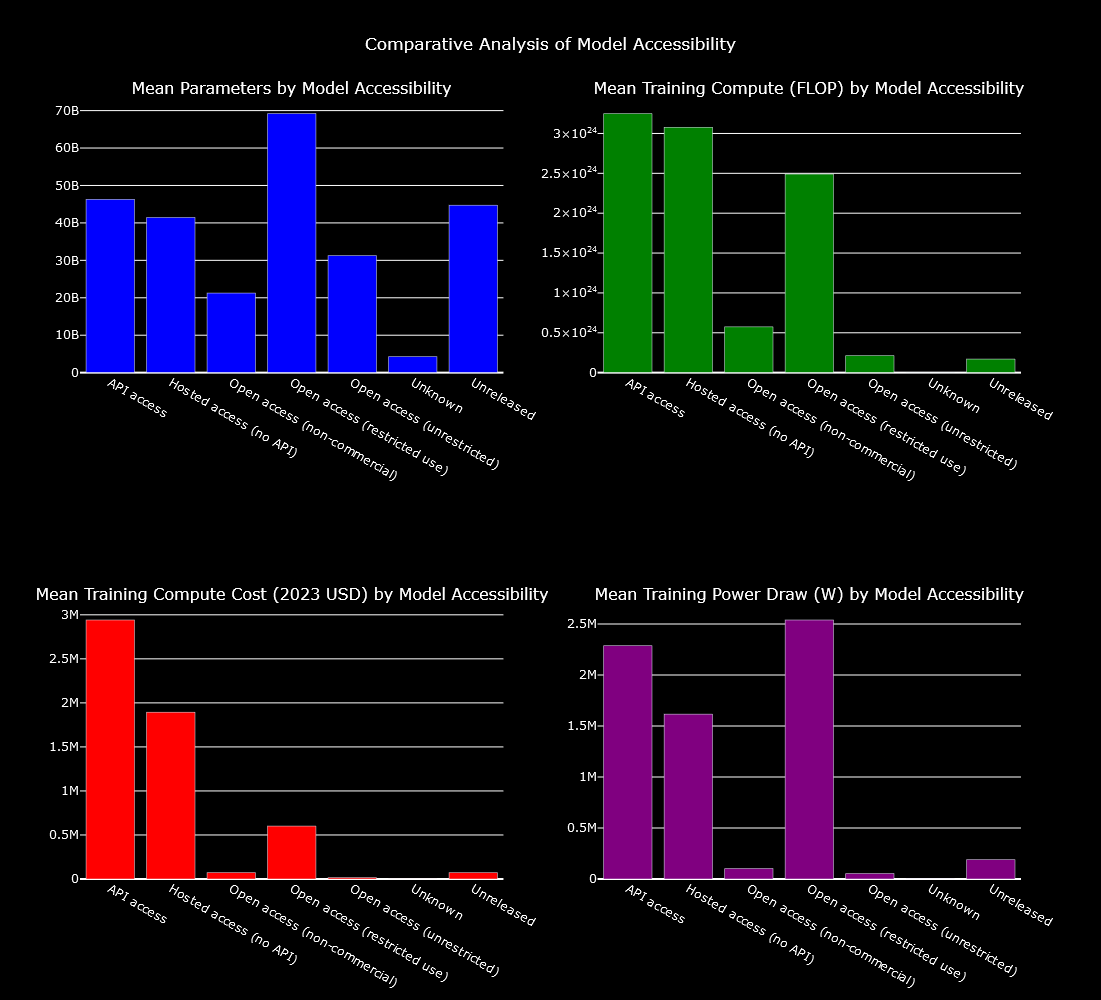

In [50]:
#Group data for Accessibility patterns based on model accessibility
accessibility_analysis = ai_models.groupby('Model_accessibility')[['Parameters', 'Training compute (FLOP)','Training compute cost (2023 USD)', 
                                                                  'Training power draw (W)']].mean()

#library for creating interactive visualizations.
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Plot a figure with 2 rows and 2 columns and adjust the vertical spacing between subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('Mean Parameters by Model Accessibility',
                                                    'Mean Training Compute (FLOP) by Model Accessibility',
                                                    'Mean Training Compute Cost (2023 USD) by Model Accessibility',
                                                    'Mean Training Power Draw (W) by Model Accessibility'), 
                    vertical_spacing=0.3  #Increasing the vertical space between subplots.
                   )

#Ploting of Parameters.
fig.add_trace(go.Bar(x=accessibility_analysis.index, y=accessibility_analysis['Parameters'], name='Parameters', marker_color='blue'), row=1, col=1)

#Ploting of Training compute (FLOP).
fig.add_trace(go.Bar(x=accessibility_analysis.index, y=accessibility_analysis['Training compute (FLOP)'], name='Training Compute (FLOP)', 
                     marker_color='green'), row=1, col=2)

#Ploting of Training compute cost (2023 USD).
fig.add_trace(go.Bar(x=accessibility_analysis.index, y=accessibility_analysis['Training compute cost (2023 USD)'], name='Training Compute Cost (USD)',
                     marker_color='red'), row=2, col=1)

#Ploting of Training power draw (W).
fig.add_trace(go.Bar(x=accessibility_analysis.index, y=accessibility_analysis['Training power draw (W)'], name='Power Draw (W)',
                     marker_color='purple'), row=2, col=2)

#Customizing layout,naming a title,setting figure size and background color for readability.
fig.update_layout(
     title={
        'text': 'Comparative Analysis of Model Accessibility',
        'x': 0.5,  #Centering the title.
     },
    showlegend=False, 
    height=1000,  #Height in pixels.
    paper_bgcolor='black', #For background color outside the plot area.
    plot_bgcolor='black',  #For background color of the plot area.
    font_color='white', #Changing the font color to white for readability and visibility.
)

#Display the plots.
fig.show()

** <b><u>Insights from the visual:</u></b><br>
These insights provide a clear overview of the relationship between model accessibility and resource usage, with open and API-access models representing the extremes in terms of both complexity and cost.
+ Open access (unrestricted) models are the most complex and resource-intensive across various metrics (parameters, compute, power), making them leading candidates for AI research but also more expensive in terms of power and computational resources.
+ API access models stand out for their very high training costs, indicating that while APIs make models accessible for broader use, they are costly to maintain.
+ Hosted access and Restricted-use open access, show efficiency in both compute and cost but trade off model complexity. This suggests a balance between accessibility and resource consumption depending on the use case.

<font size="5">4. Identifying relationship between parameters,Training time(hours),Training compute cost(2023 USD),Training power draw(W) and Training compute(FLOP).</font>

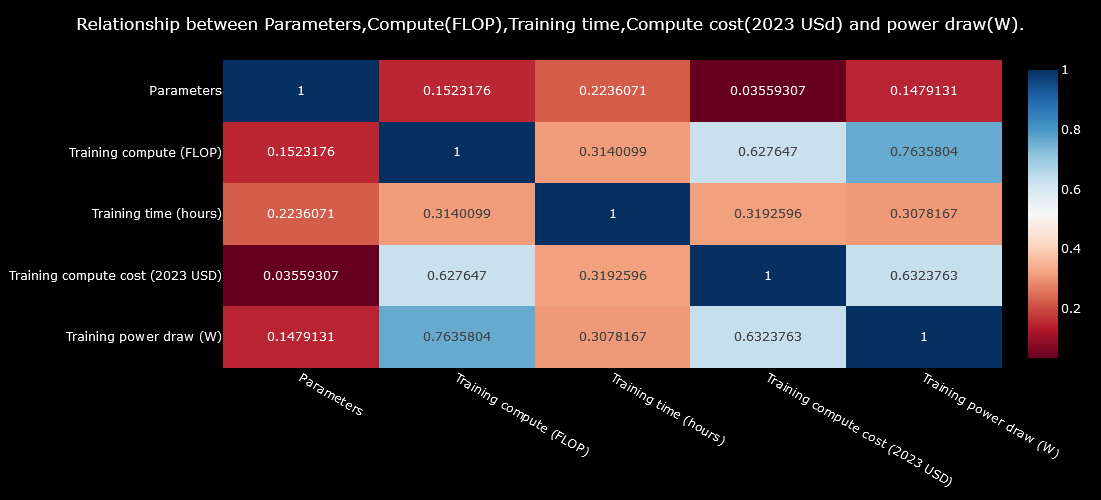

In [54]:
#Defining the relationship on the inditifing columns.
corr_rp = ai_models[['Parameters', 'Training compute (FLOP)', 'Training time (hours)','Training compute cost (2023 USD)',
                          'Training power draw (W)']].corr()

#Library that generates interactive web-based visualizations.
import plotly.express as px

#Plotting the visualizing.
corr_rp_heatmap = px.imshow(corr_rp, text_auto=True, color_continuous_scale='RdBu', aspect='auto')

#Customizing layout,naming a title,setting figure size and background color for readability.
corr_rp_heatmap.update_layout(
    title={
        'text': 'Relationship between Parameters,Compute(FLOP),Training time,Compute cost(2023 USd) and power draw(W). ',
        'x': 0.5,  #Centering the title.
    },
    paper_bgcolor='black', #For background color outside the plot area.
    plot_bgcolor='black',  #For background color of the plot area.
    font_color='white', #Changing the font color to white for readability and visibility.
    height=500    #Height in pixels.
)
#Displaying the heatmap.
corr_rp_heatmap.show()

<font size= 4><u><b>**Obervations from the above visual** : </b></u></font><br> 
1. Strong Correlation between Training compute (FLOP) and Training Power Draw (W).
    + The Training compute (FLOP) shows a high positive correlation of 0.76 with Training Power Draw (W), this indicates that as the computational load increases the power consumption also increases significantly.
2. Moderate Correlation between Training Time and Training Compute .
   + Training Time (hours) shows moderate positive correlations with both Training compute (FLOP) of 0.31 and Training compute cost (2023 USD) of 0.32, this indicates that longer training durations are associated with higher computational demands and cost.
3. Weak Correlation between Parameters and Other Factors.
   + The Parameters of models show weak correlations with other variables like Training compute cost (2023 USD) 0f 0.03 and Training Power Draw (W) of 0.15 this indicates that the number of parameters alone does not strongly determine compute cost or power usage. <br>
   
** <b><u>Insights from the visual:</u></b><br>
The above visual emphasizes on the interconnection between computational demand, power usage and training cost also highlighting the impact of compute-heavy models on operational expenses and sustainability.
+ The strong correlation between Training compute (FLOP) and Training Power Draw (W) shows that as models require more to compute the energy consumption increases,hence more efficient hardware or energy optimization is critical for large models.
+ Training Compute Cost is linked to Training compute (FLOP) and Training Time (hours) shows the importance of managing compute resources effectively.

<font size="5">5. Analysis trend over year if new models will require more compute or have higher costs.</font>

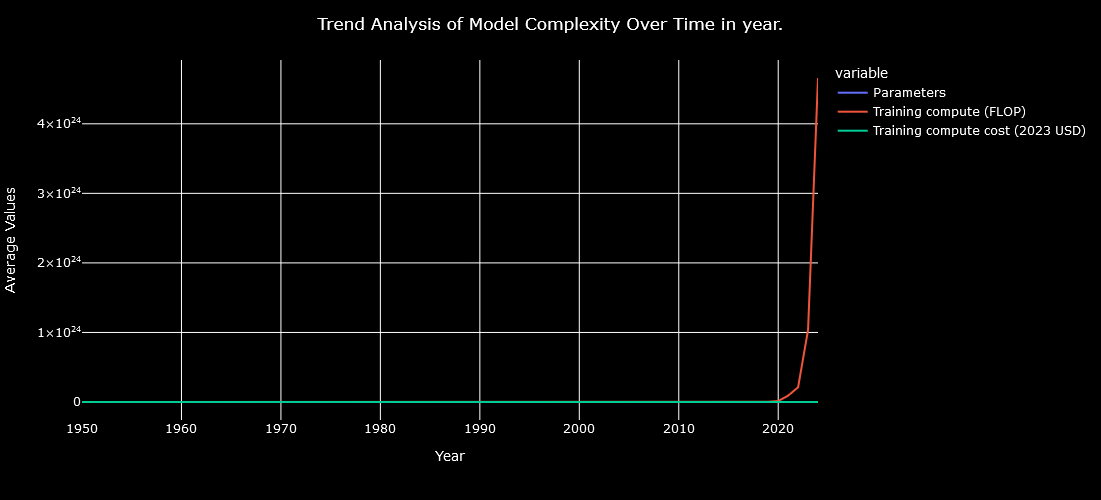

In [58]:
#Converting Publication date to year.
ai_models['Publication date'] = pd.to_datetime(ai_models['Publication date'], errors='coerce')
ai_models['Year'] = ai_models['Publication date'].dt.year

#Library that generates interactive web-based visualizations.
import plotly.express as px

#Group the data by year and calculate the mean for the specified columns.
year_trend = ai_models.groupby(ai_models['Publication date'].dt.year)[['Parameters', 'Training compute (FLOP)', 
                                                                       'Training compute cost (2023 USD)']].mean().reset_index()

#Ploting the line plot using Plotly Express
fig = px.line( year_trend, 
              x='Publication date',  #X-axis(Year). 
              y=['Parameters', 'Training compute (FLOP)', 'Training compute cost (2023 USD)'],  # Y-axis(Multiple trends)
              labels={'value': 'Average Values', 'Publication date': 'Year'},  #This are Axis labels.
              )

#Customizing layout,naming a title,setting figure size and background color for readability.
fig.update_layout(
    title={
        'text': 'Trend Analysis of Model Complexity Over Time in year.',
        'x': 0.5,  #Centering the title.
          },
    paper_bgcolor='black', #For background color outside the plot area.
    plot_bgcolor='black',  #For background color of the plot area.
    font_color='white', #Changing the font color to white for readability and visibility.
    height=500    #Height in pixels.
)

#Displaying the line plot.
fig.show()

<font size= 4><u><b>**Obervations from the above visual** : </b></u></font><br> 
1. Training Compute Cost (2023 USD) remains flat in , indicating that  the cost of compute has not scaled as dramatically.
2. There is exponential increase in Training Compute (FLOP) starting around the year 2020. <br>

** <b><u>Insights from the visual:</u></b><br>
The visual indicates that future  models will continue to grow in complexity but the economic feasibility of training them may depend on further advancements in computational efficiency.
+ Rapid growth post-2020 reflects technological advancements like efficient AI architectures, larger-scale data processing capabilities and specialized hardware e.g GPUs, TPUs that can handle increasing FLOP and parameter counts efficiently.
+ Despite this massive growth in complexity, cost of training these models has remained relatively stable due to improvements in hardware efficiency or optimized algorithms.

<font size="5">6. Analysis to check if there is a trade-off between training time and power consumption.</font>

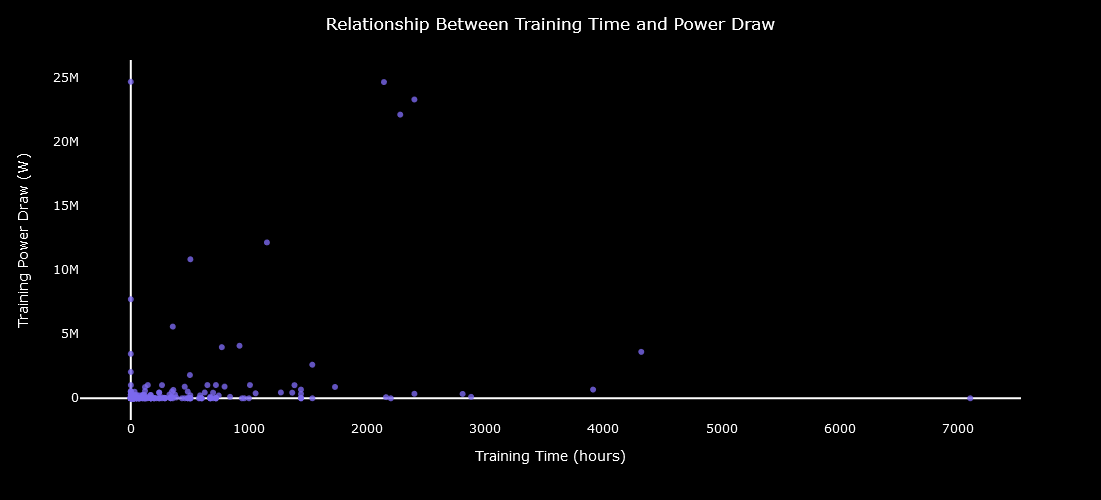

In [62]:
#Library that generates interactive web-based visualizations.
import plotly.express as px

#Extract the relevant columns and remove missing values for the analysis.
power_vs_time = ai_models[['Training time (hours)', 'Training power draw (W)']].dropna()

#Plot a scatter plot using Plotly Express.
fig = px.scatter(power_vs_time, x='Training time (hours)', y='Training power draw (W)', labels={'Training time (hours)': 'Training Time (hours)', 
                         'Training power draw (W)': 'Training Power Draw (W)'}, opacity=0.8,  #Control transparency.
                 color_discrete_sequence=['MediumSlateBlue'])  #Setting points color to red.

#Customizing layout,naming a title,setting figure size and background color for readability.
fig.update_layout(
    title={
        'text': 'Relationship Between Training Time and Power Draw',
        'x': 0.5,  #Centering the title.
    },
    xaxis=dict(showgrid=False),  # Remove X-axis gridlines
    yaxis=dict(showgrid=False),  # Remove Y-axis gridlines
    paper_bgcolor='black', #For background color outside the plot area.
    plot_bgcolor='black',  #For background color of the plot area.
    font_color='white', #Changing the font color to white for readability and visibility.
    height=500    #Height in pixels.
)

#Displaying the scatter plot.
fig.show()

<font size="5">7. Assessing the distribution and relationships between Hardware quantity,Hardware utilization, Training time (hours).</font>

C:\Users\sa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



OSError: 'black' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

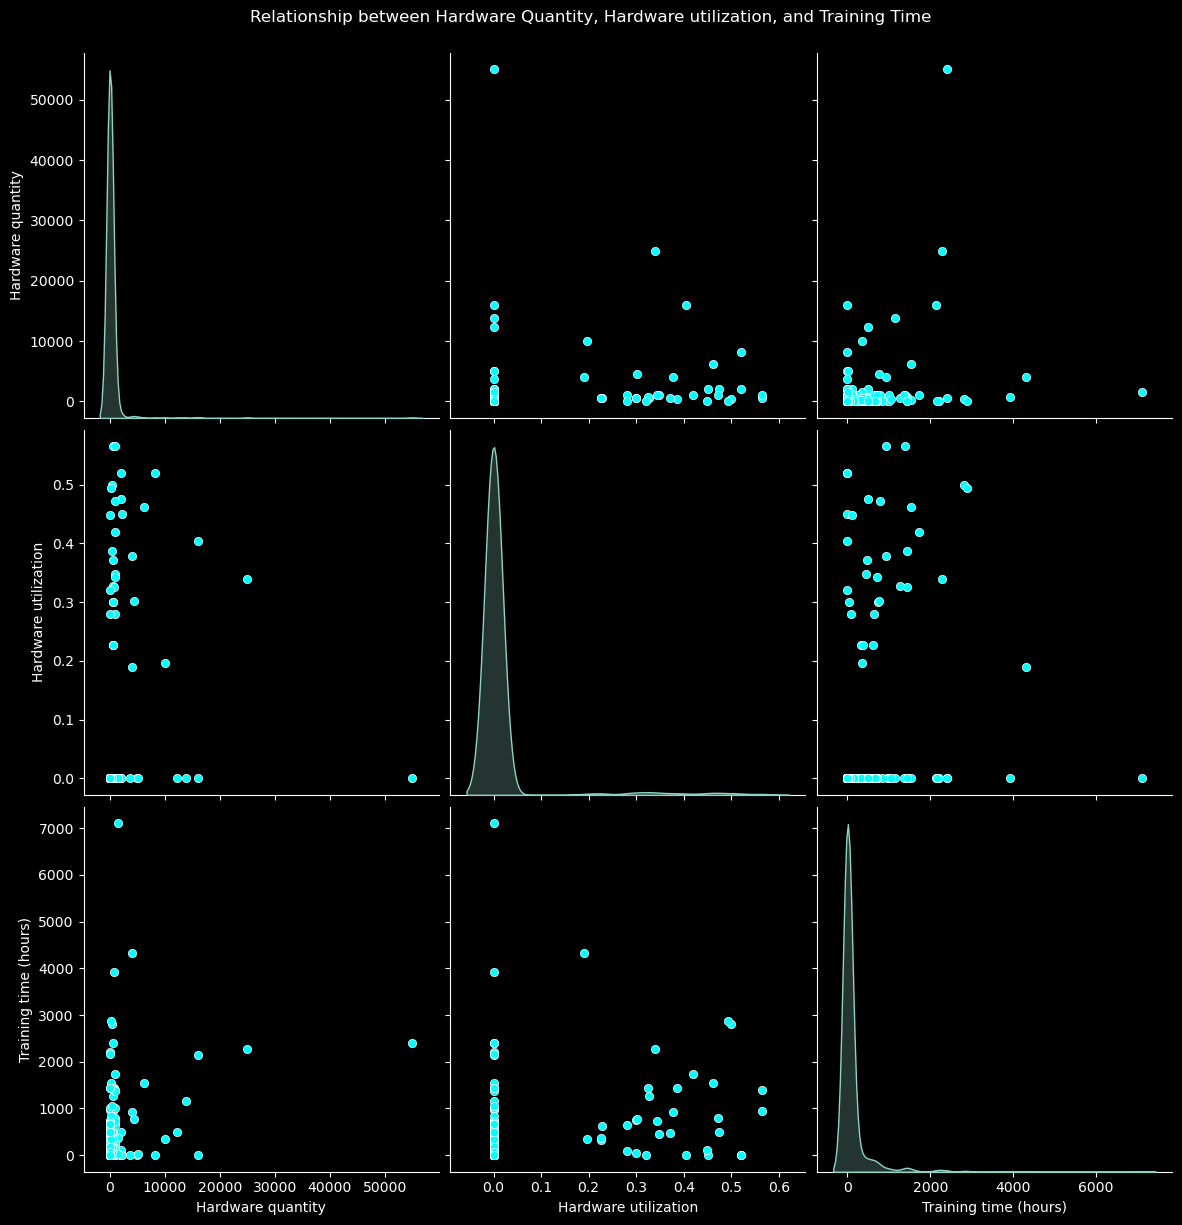

In [71]:
#Converting the infinite values to NaN
ai_models[['Hardware quantity', 'Hardware utilization', 'Training time (hours)']] = ai_models[['Hardware quantity', 'Hardware utilization', 'Training time (hours)']].replace([np.inf, -np.inf], np.nan)

#Drop rows with NaN values.
ai_models_clean = ai_models[['Hardware quantity', 'Hardware utilization', 'Training time (hours)']].dropna()

#Ploting each subplot of the pairplot.
pairplot = sns.pairplot(ai_models_clean, diag_kind='kde', plot_kws={'color': 'cyan'}, height=4, )

#Title nameing of the pairplot.
plt.suptitle('Relationship between Hardware Quantity, Hardware utilization, and Training Time', y=1.02,color="white")


plt.style.use('black') #Set dark theme of figure background.
pairplot.fig.set_facecolor('black')  #Set the background of the plot to black.               

#Display the pairplot.
plt.show()

<font size='5'>8. Relationship Between Hardware Utilization and Training Time in hours. </font>
+ Helps to is how the Hardware utilization impacts the Training time

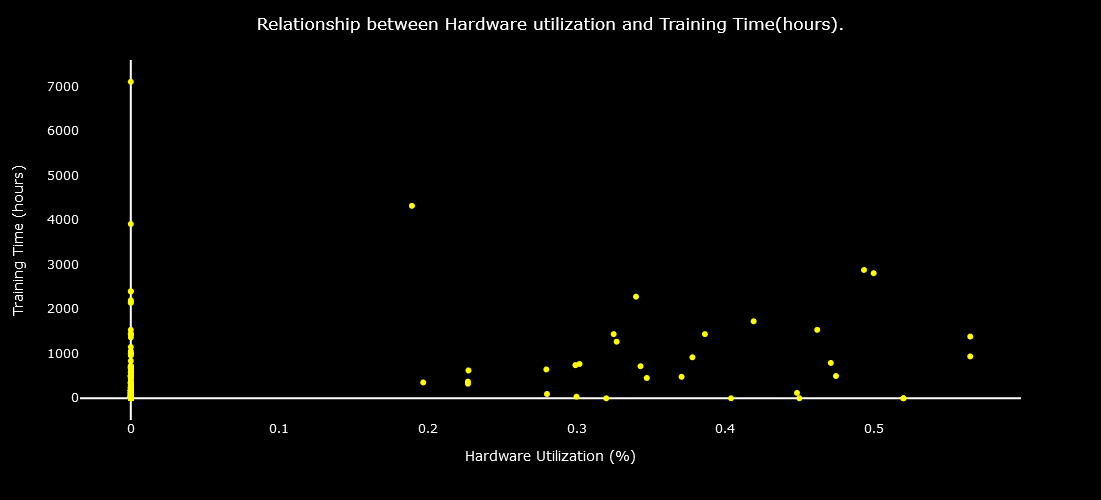

In [74]:
import plotly.express as px

#Ploting a scatter plot using plotly express.
fig = px.scatter(ai_models, x='Hardware utilization', y='Training time (hours)',  color_discrete_sequence=['yellow'],
                 labels={'Hardware utilization': 'Hardware Utilization (%)','Training time (hours)': 'Training Time (hours)'}
                )
#Customizing layout,naming a title,setting figure size and background color for readability.
fig.update_layout(
    title={
        'text': 'Relationship between Hardware utilization and Training Time(hours).',
        'x': 0.5,  #Centering the title.
    },
    xaxis=dict(showgrid=False),  #Remove X-axis gridlines.
    yaxis=dict(showgrid=False),  #Remove Y-axis gridlines.
    paper_bgcolor='black', #For background color outside the plot area.
    plot_bgcolor='black',  #For background color of the plot area.
    font_color='white', #Changing the font color to white for readability and visibility.
    height=500    #Height in pixels.
)

#Displaying the scatter plot.
fig.show()

<font size= 4><u><b>**Obervations from the above visual** : </b></u></font><br> 
1. Large number of data points are clustered around very low hardware utilization close to 0%  yet their training times range widely untill to the highest recorded training times.
2. The values for hardware utilization are concentrated below 0.5 (50% utilization) meaning the models are mostly running at a low to moderate hardware usage rate. <br>

** <b><u>Insights from the visual:</u></b><br>
The graphic shows that simply increasing hardware utilization might not be sufficient to decrease training time.
+ Inefficient Resource Utilization due to scattered distribution suggests that increasing hardware utilization does not consistently reduce training time.
+ Some models are taking an extremely long time to train even when hardware utilization is minimal indicating possible inefficiencies in hardware use.

# **5. PREDICTION ANALYSIS AND EVALUATION METRICS.**

In [78]:
#Importing the necessary libraries.

#Importing the sklearn model selection for traing and testing the dataset.
from sklearn.model_selection import train_test_split

#Importing the sklearn for models: LinearRegression, RandomForestRegressor, GradientBoostingRegressor and SVR.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

#from sklearn import metrics for evaluations.
from sklearn.metrics import mean_squared_error,r2_score

<font size='5'>1. Prediction of Training Compute Cost Based on Parameters, Training Time(hours) and Training power draw(W).</font>

In [81]:
#Prepare and spliting the data relevant features and target variable for Training compute cost prediction.
X_compute_cost = ai_models[['Parameters', 'Training time (hours)', 'Training power draw (W)']].fillna(0)
y_compute_cost = ai_models['Training compute cost (2023 USD)']

#Split data for training and testing sets that is 80% train, 20% test.
X_train, X_test, y_train, y_test = train_test_split(X_compute_cost, y_compute_cost, test_size=0.2, random_state=42)

#Train and fit the linear regression model.
compute_cost_model = LinearRegression()
compute_cost_model.fit(X_train, y_train)

#Predicting on the test set and calculating mean square error(MSE).
y_pred_compute_cost = compute_cost_model.predict(X_test)
compute_cost_mse = mean_squared_error(y_test, y_pred_compute_cost)

#Display the result of calculated mean square error(MSE).
print(f"Training Compute Cost (2023 USD) Prediction MSE: {compute_cost_mse}")

Training Compute Cost (2023 USD) Prediction MSE: 4044868585203.166


<font size='5'>2. Prediction of Training power draw (W) based on Parameters and Training time (hours).</font>

In [84]:
#Prepare and spliting the data relevant features and target variable for Training power draw (w) prediction.
X_power_draw = ai_models[['Parameters','Training time (hours)']].fillna(0)
y_power_draw = ai_models['Training power draw (W)'].fillna(0)

#Split data for training and testing sets that is 80% train, 20% test.
X_train, X_test, y_train, y_test = train_test_split(X_power_draw, y_power_draw, test_size=0.2, random_state=42)

#Defining the List of models to compare.
models = {
    "Linear Regression": LinearRegression(), 
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor (SVR)": SVR()
}

#Create a dictionary to store the MSE of each model.
model_mse = {}

#Training, fiting and evaluating each model.
for model_name, model in models.items():
#Train the model.
    model.fit(X_train, y_train)
    
#Prediction on the test set.
    y_pred = model.predict(X_test)
    
#Calculation of the error which is the MSE.
    mse = mean_squared_error(y_test, y_pred)
    
#Store the MSE to the dictionary created.
    model_mse[model_name] = mse

#Helps to identify the best model that has the lowest MSE.
best_model_name = min(model_mse, key=model_mse.get)
best_model_mse = model_mse[best_model_name]

#Display the results.
print("Prediction of Training power draw (W):")
print(f"Best Model: {best_model_name}")
print(f"Best Model MSE: {best_model_mse}")
print("\nMean Squared Errors for all models:")
for model_name, mse in model_mse.items():
    print(f"{model_name}: {mse}")

Prediction of Training power draw (W):
Best Model: Linear Regression
Best Model MSE: 4176955183380.668

Mean Squared Errors for all models:
Linear Regression: 4176955183380.668
Random Forest Regressor: 4996214825952.06
Gradient Boosting Regressor: 6462303258400.063
Support Vector Regressor (SVR): 5004203955762.492


<font size='5'>3. Prediction of future model complexity (Parameters) and Traing compute cost (2023 USD).</font>

In [87]:
#Converting Publication date to year.
ai_models['Publication date'] = pd.to_datetime(ai_models['Publication date'], errors='coerce')
ai_models['Year'] = ai_models['Publication date'].dt.year
ai_models = ai_models.dropna(subset=['Year'])

#Group the data by Model Publication(Year) calculate the mean for the specified column.
forecast_data = ai_models.groupby('Year')[['Parameters', 'Training compute cost (2023 USD)']].mean().reset_index()

#Prepare and spliting the data relevant Features (Year) and Targets (Parameters, Training Compute Cost).
X_year = forecast_data[['Year']]
y_params = forecast_data['Parameters']
y_cost = forecast_data['Training compute cost (2023 USD)']

#Set a seed for reproducibility.
np.random.seed(42)

# #Split data for training and testing sets that is 80% train, 20% test with consistent random seed.
X_train, X_test, y_train_params, y_test_params = train_test_split(X_year, y_params, test_size=0.2, random_state=42)
_, _, y_train_cost, y_test_cost = train_test_split(X_year, y_cost, test_size=0.2, random_state=42)

##Defining the List of models to compare.
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

#Function to train,fit, predict and evaluate models.
def evaluate_models(X_train, y_train, X_test, y_test):
    
#Create a dictionary to store the MSE and R2 of each model.
    results = {}
    for name, model in models.items():     
#Train the model.
        model.fit(X_train, y_train)  
        
#Prediction on the test set.
        y_pred = model.predict(X_test) 
        
#Calculation of the error which is the MSE.
        mse = mean_squared_error(y_test, y_pred)
        
#Calculation of the metric R2.
        r2 = r2_score(y_test, y_pred) 
        
#Store metrics; MSE and R2 to the dictionary created.
        results[name] = {'MSE': mse, 'R2': r2}  
    return results

#Evaluate models for Parameters and Training Compute Cost
params_results = evaluate_models(X_train, y_train_params, X_test, y_test_params)
cost_results = evaluate_models(X_train, y_train_cost, X_test, y_test_cost)

#Display the best models based on MSE which has to be the lowest.
best_params_model = min(params_results, key=lambda x: params_results[x]['MSE'])
best_cost_model = min(cost_results, key=lambda x: cost_results[x]['MSE'])

print(f"Best Model for Parameters: {best_params_model}, MSE: {params_results[best_params_model]['MSE']}, R2: {params_results[best_params_model]['R2']}")
print(f"Best Model for Compute Cost: {best_cost_model}, MSE: {cost_results[best_cost_model]['MSE']}, R2: {cost_results[best_cost_model]['R2']}")

Best Model for Parameters: Random Forest Regressor, MSE: 3.4236418198360277e+19, R2: 0.9109761799816035
Best Model for Compute Cost: Random Forest Regressor, MSE: 73519160029.01419, R2: -0.03876275653166372


In [89]:
#Predicting future trends for  years: 2024, 2025, 2026 using the best models.
future_years = np.array([[2024], [2025], [2026]])
future_years_df = pd.DataFrame(future_years, columns=['Year']).astype(float)

#Refit the best models on the full dataset for final predictions
best_params_model_instance = models[best_params_model].fit(X_year, y_params)
best_cost_model_instance = models[best_cost_model].fit(X_year, y_cost)

#Predict future values.
params_future = best_params_model_instance.predict(future_years_df)
cost_future = best_cost_model_instance.predict(future_years_df)

print("Predicted Parameters for 2024, 2025, 2026:", params_future)
print("Predicted Training Compute Cost (2023 USD) for 2024, 2025, 2026:", cost_future)


Predicted Parameters for 2024, 2025, 2026: [257688.83180108 257688.83180108 257688.83180108]
Predicted Training Compute Cost (2023 USD) for 2024, 2025, 2026: [257688.83180108 257688.83180108 257688.83180108]


# **6. PREDICTION VISUALIZATION.**
+ Actual vs Predicted Parameters and Compute Costs from 2024 to 2026.

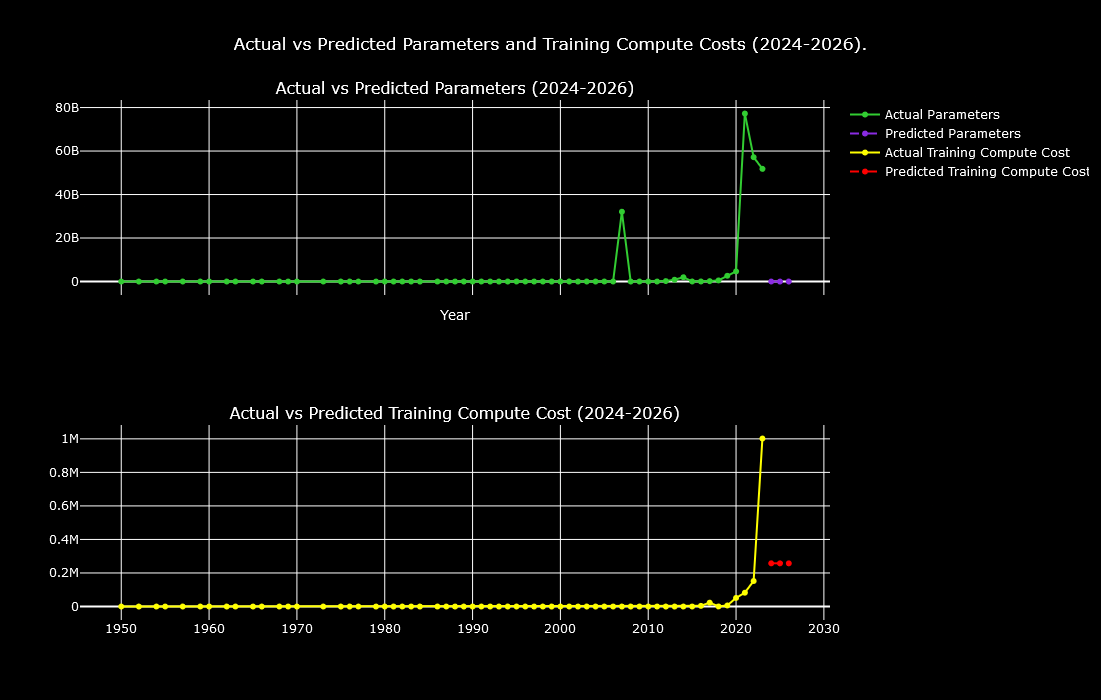

In [92]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Converting Publication date to year.
ai_models['Publication date'] = pd.to_datetime(ai_models['Publication date'], errors='coerce')
ai_models['Year'] = ai_models['Publication date'].dt.year
historical_data = ai_models[ai_models['Year'] < 2024].groupby('Year')[['Parameters', 'Training compute cost (2023 USD)']].mean().reset_index()

#define historical values from the dataset.
historical_years = historical_data['Year'].values
actual_parameters = historical_data['Parameters'].values
actual_compute_cost = historical_data['Training compute cost (2023 USD)'].values

#Define the predicted values for 2024, 2025, 2026.
future_years = np.array([2024, 2025, 2026])
predicted_parameters = np.array([257688.83180108, 257688.83180108, 257688.83180108])
predicted_compute_cost = np.array([257688.83180108, 257688.83180108, 257688.83180108])

#Plot subplots for parameters and Trainng compute costs.
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Actual vs Predicted Parameters (2024-2026)",
                                                                       "Actual vs Predicted Training Compute Cost (2024-2026)"))

#Plot for actual and predicted parameters.
fig.add_trace(go.Scatter(x=historical_years, y=actual_parameters, mode='lines+markers', name='Actual Parameters', line=dict(color='LimeGreen')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=future_years, y=predicted_parameters, mode='lines+markers', name='Predicted Parameters',
                         line=dict(color='BlueViolet', dash='dash')), row=1, col=1)

# Plot for actual and predicted Training compute costs.
fig.add_trace(go.Scatter(x=historical_years, y=actual_compute_cost, mode='lines+markers', name='Actual Training Compute Cost', line=dict(color='yellow')),
              row=2, col=1)
fig.add_trace(go.Scatter(x=future_years, y=predicted_compute_cost, mode='lines+markers', name='Predicted Training Compute Cost', 
                         line=dict(color='red', dash='dash')), row=2, col=1)

#Customizing layout,naming a title,setting figure size and background color for readability.
fig.update_layout(
    title={
        'text': 'Actual vs Predicted Parameters and Training Compute Costs (2024-2026).',
        'x': 0.5,  #Centering the title.
    },
    xaxis_title='Year', 
    showlegend=True,
    paper_bgcolor='black', #For background color outside the plot area.
    plot_bgcolor='black',  #For background color of the plot area.
    font_color='white', #Changing the font color to white for readability and visibility.
    height=700    #Height in pixels.
)

#Display the Plotl.
fig.show()

<font size= 4><u><b>**Obervations from the above visual** : </b></u></font><br> 
Plot figure 1: Actual vs Predicted Parameters (2024-2026):
1. Historical Data before 2024 of the Actual Parameters (green line) remain relatively low and stable for many years with no fluctuations.
2. Around 2020 there is a sharp spike in the actual parameters, reaching their peak and then dropping slightly reflecting the rapid growth in model sizes in recent years.
3. Predicted Parameters for 2024-2026 (purple line) shows that parameters are expected to stabilize in the short term after the recent surge.
   
Plot figure 2: Actual vs Predicted Training Compute Cost (2024-2026):
1. Historical Trend Before 2024 of the Actual Training Compute Cost (yellow line) shows a long period of stability.
2. Starting around 2020 shows a growing compute costs as models become larger and more compute-intensive.
3. Predicted Compute Cost (2024-2026) in the red dotted line shows predictions of a continued rise in compute costs, though at a slower rate.<br>

** <b><u>Insights from the visual:</u></b><br>
+ The predicted stabilization in model parameters suggests that, while AI models have grown in size, the increase may plateau in the next few years.
+ Though parameter growth may stabilize, compute costs are expected to rise, suggesting future models will prioritize training efficiency over sheer size.<br>

<font size= 4><u><b>**Conclusion from the above visual** : </b></u></font><br> 
+ Over the past decade, AI models have grown significantly in size and training costs but projections indicate a shift toward greater efficiency, likely fueled by innovations in model design and training methods.